In [32]:
##############################################IMPORT##################################################
#filepath = Path('zillow.csv')
#filepath.parent.mkdir(parents=True, exist_ok=True)
#df.to_csv(filepath, index=False)


# importing of all needed libraries and modules.  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")
from env import host, user, password
import wrangle
from scipy import stats
from scipy.stats import pearsonr, spearmanr

Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [33]:
train, validate, test = wrangle.wrangle_zillow()

In [34]:
train.head()

,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
51993,3.0,2.0,1274.0,237392.0,1971.0,2848.76,6059.0,46.0
1286814,1.0,2.0,2062.0,122766.0,1949.0,1647.70,6037.0,68.0
772171,3.0,2.0,1243.0,206365.0,1957.0,2406.12,6059.0,60.0
279343,3.0,2.0,1472.0,119060.0,1977.0,1173.36,6059.0,40.0
1558636,4.0,2.5,2713.0,319246.0,1973.0,3980.50,6059.0,44.0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167572 entries, 51993 to 188688
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Bedrooms          1167572 non-null  float64
 1   Bathrooms         1167572 non-null  float64
 2   Square_Feet       1167572 non-null  float64
 3   Total_Home_Value  1167572 non-null  float64
 4   Year_Built        1167572 non-null  float64
 5   Taxes             1167572 non-null  float64
 6   Region            1167572 non-null  float64
 7   Age               1167572 non-null  float64
dtypes: float64(8)
memory usage: 80.2 MB


In [36]:
train_1=train.sample(frac=0.001, random_state=123)

In [37]:
train_1.head()

,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
144376,3.0,3.0,2524.0,898495.0,1990.0,9879.99,6037.0,27.0
1975114,4.0,2.0,1242.0,54483.0,1954.0,1156.50,6037.0,63.0
1371551,4.0,3.0,2128.0,847769.0,1944.0,10321.76,6037.0,73.0
453998,3.0,3.0,2669.0,790578.0,1987.0,9853.14,6037.0,30.0
1847610,3.0,2.0,1986.0,273981.0,1972.0,3589.63,6037.0,45.0


In [7]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 144376 to 1894502
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bedrooms          1168 non-null   float64
 1   Bathrooms         1168 non-null   float64
 2   Square_Feet       1168 non-null   float64
 3   Total_Home_Value  1168 non-null   float64
 4   Year_Built        1168 non-null   float64
 5   Taxes             1168 non-null   float64
 6   Region            1168 non-null   float64
 7   Age               1168 non-null   float64
dtypes: float64(8)
memory usage: 82.1 KB


In [8]:
print(train_1["Bedrooms"].unique())

[3. 4. 2. 5. 6. 1.]


In [9]:
print(train_1["Bathrooms"].unique())

[3.  2.  1.  2.5 3.5 5.  1.5 4.  4.5 0. ]


In [10]:
print(train_1["Region"].unique())

[6037. 6111. 6059.]


In [11]:
print(train_1["Square_Feet"].nunique())

906


In [12]:
print(train_1["Taxes"].unique())

[ 9879.99  1156.5  10321.76 ...  6820.94  1420.55 14604.76]


In [13]:
print(train_1["Taxes"].nunique())

1166


In [14]:
print(train_1["Total_Home_Value"].unique())

[898495.  54483. 847769. ... 578000. 106436. 910072.]


In [15]:
print(train_1["Total_Home_Value"].nunique())

1147


In [16]:
print(train_1["Total_Home_Value"].min())

22108.0


In [17]:
print(train_1["Total_Home_Value"].max())

1895596.0


3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
#def plot_variable_pairs(df):
 #   sns.pairplot(data=train_1, kind="reg")

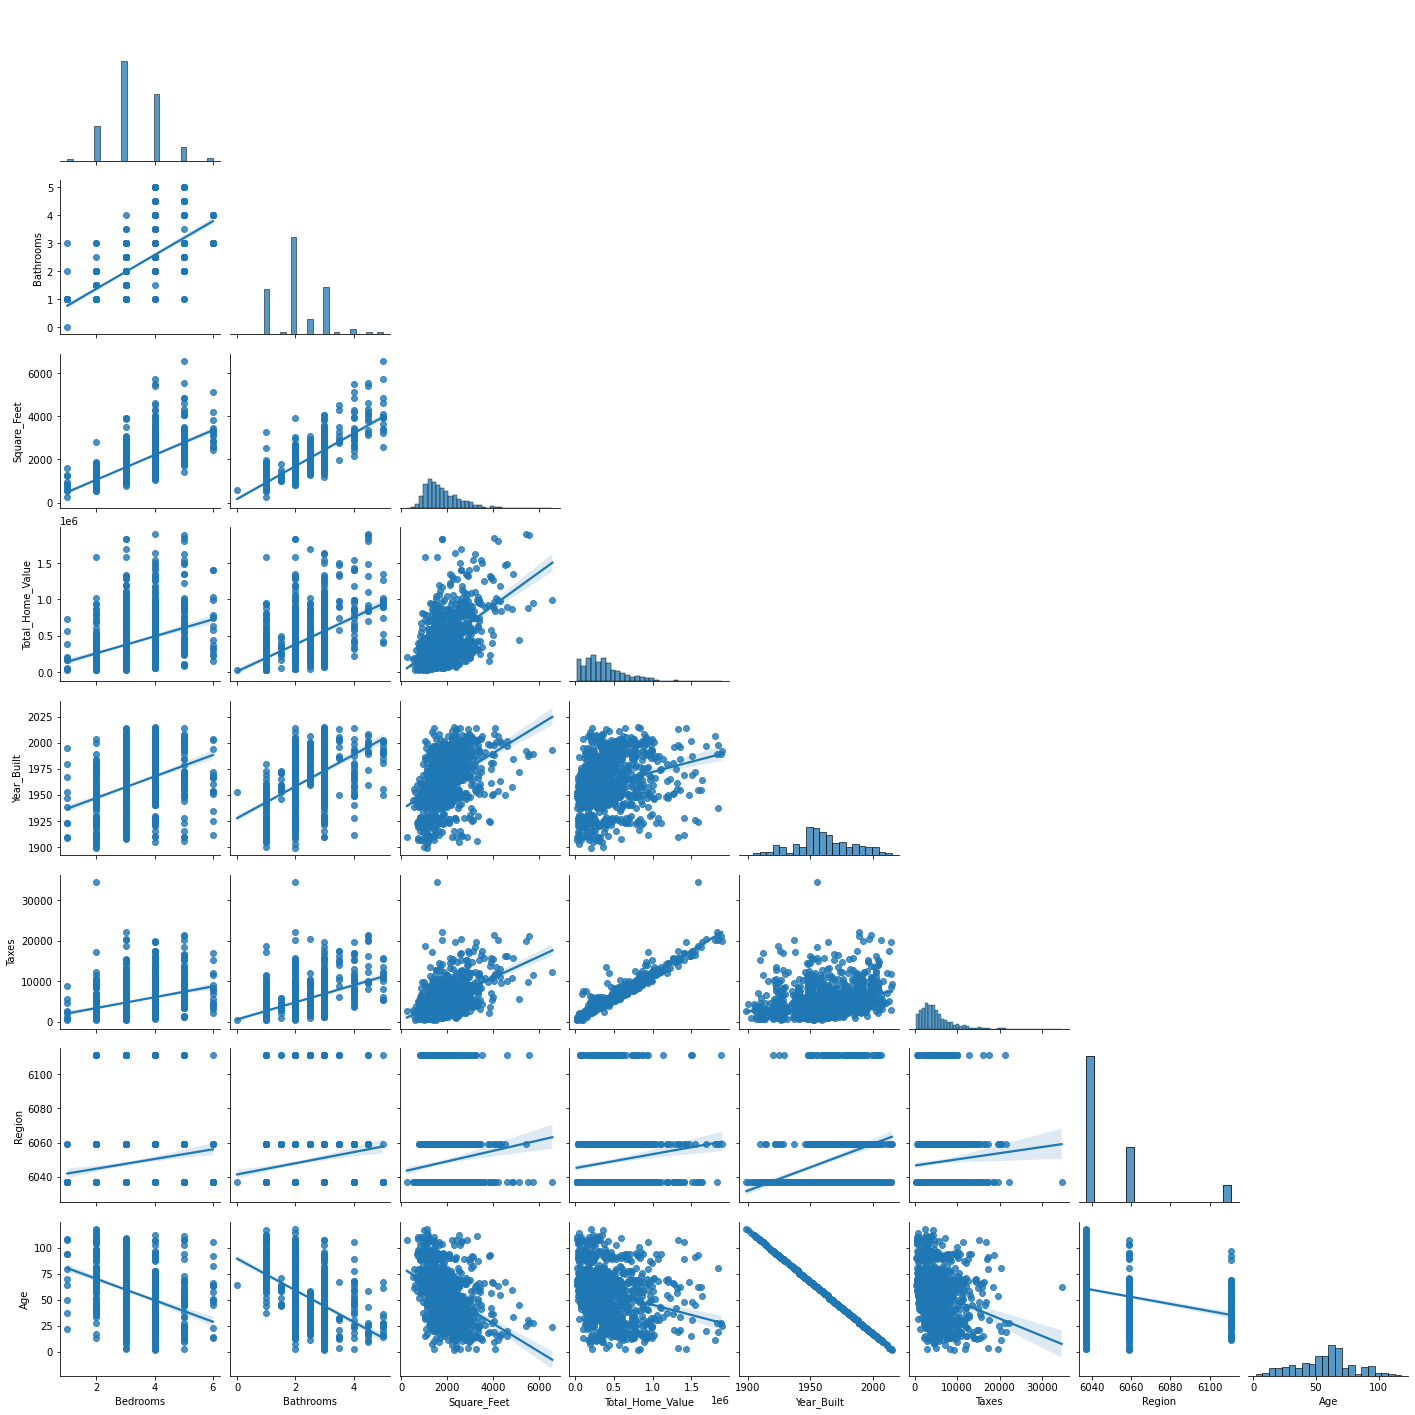

In [19]:
sns.pairplot(data=train_1, kind="reg", corner=True)

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [20]:
def plot_categorical_and_continuous_vars(df):
    for column in train_1[['Region']]:

IndentationError: expected an indented block (1945328053.py, line 2)

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

Hypothesis
H0 = My Null Hypothesis is that there is no correlation between my target variable, Total House Value, and the other variables.
HA= My Alternative Hypothesis is that there is no correlation between my target variable, Total House Value, with the other variables.

The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.

In [21]:
# Create the correlation matrix for variables

pearson_train_1_corr = train.corr()
pearson_train_1_corr


,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
Bedrooms,1.000000,0.622699,0.609136,0.259467,0.379323,0.260830,0.150983,-0.379323
Bathrooms,0.622699,1.000000,0.806953,0.487610,0.532832,0.489157,0.125007,-0.532832
Square_Feet,0.609136,0.806953,1.000000,0.569507,0.475087,0.566267,0.132393,-0.475087
Total_Home_Value,0.259467,0.487610,0.569507,1.000000,0.263791,0.976030,0.075979,-0.263791
Year_Built,0.379323,0.532832,0.475087,0.263791,1.000000,0.270442,0.306522,-1.000000
Taxes,0.260830,0.489157,0.566267,0.976030,0.270442,1.000000,0.028088,-0.270442
Region,0.150983,0.125007,0.132393,0.075979,0.306522,0.028088,1.000000,-0.306522
Age,-0.379323,-0.532832,-0.475087,-0.263791,-1.000000,-0.270442,-0.306522,1.000000


In [22]:
spearman_train_1_corr= train.corr(method='spearman')[['home_value']].sort_values(by='Total_Home_Value', ascending=False)

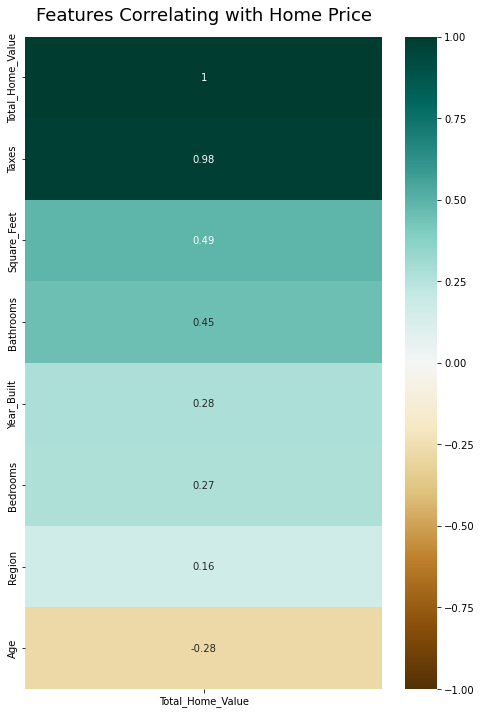

In [23]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['Total_Home_Value']].sort_values(by='Total_Home_Value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Home Price', fontdict={'fontsize':18}, pad=16);

In [41]:
def heatcorr(target_var):
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(train.corr(method='spearman')[[target_var]].sort_values(by=target_var, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(f'Features Correlating with {target_var}', fontdict={'fontsize':18}, pad=16);

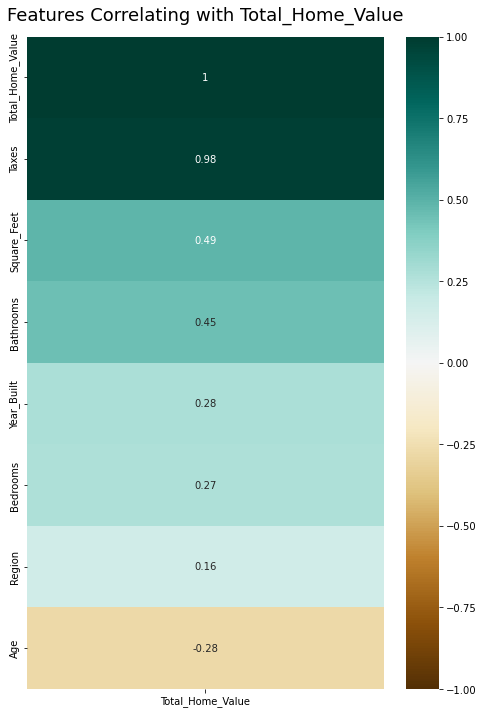

In [43]:
heatcorr('Total_Home_Value')

In [24]:
spearman_train_1_corr = train.corr(method='spearman')
spearman_train_1_corr


,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
Bedrooms,1.000000,0.619603,0.642894,0.265874,0.424815,0.267533,0.185821,-0.424815
Bathrooms,0.619603,1.000000,0.814916,0.448106,0.572737,0.447761,0.195293,-0.572737
Square_Feet,0.642894,0.814916,1.000000,0.491868,0.511297,0.489308,0.194964,-0.511297
Total_Home_Value,0.265874,0.448106,0.491868,1.000000,0.277856,0.977240,0.158146,-0.277856
Year_Built,0.424815,0.572737,0.511297,0.277856,1.000000,0.275979,0.417758,-1.000000
Taxes,0.267533,0.447761,0.489308,0.977240,0.275979,1.000000,0.090499,-0.275979
Region,0.185821,0.195293,0.194964,0.158146,0.417758,0.090499,1.000000,-0.417758
Age,-0.424815,-0.572737,-0.511297,-0.277856,-1.000000,-0.275979,-0.417758,1.000000


In [25]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Age)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: -0.31384763938750176
P-value: 4.105493319840735e-28


In [26]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Region)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.19825963353629145
P-value: 8.118494584296804e-12


In [27]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Taxes)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.9729867803620299
P-value: 0.0


In [28]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Year_Built)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.31384763938750176
P-value: 4.105493319840735e-28


In [29]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Square_Feet)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.5274843529420067
P-value: 1.225821486011308e-84


In [30]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Bathrooms)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.47853764490544654
P-value: 6.927979447267269e-68


In [31]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train_1.Total_Home_Value, train_1.Bedrooms)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.344612377388897
P-value: 6.5922434933206005e-34


In [38]:
def spearman_test(df, target_var, test_var):
    r, p_value = spearmanr(df[target_var], df[test_var])
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

In [40]:
spearman_test(train_1, 'Total_Home_Value', 'Bedrooms')

Correlation Coefficient: 0.344612377388897
P-value: 6.5922434933206005e-34


8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.